In [155]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DayLocator, DateFormatter
import datetime as dt


In [156]:
omsz_path = '/Users/varungandhi/Desktop/data_1/Data_OMSZ_10min.pkl'
df_omsz = pd.read_pickle(omsz_path)

In [157]:
#df_omsz

In [158]:
df_omsz['idő (UTC)'] = pd.to_datetime(df_omsz['idő (UTC)'])

In [159]:
df_oct_dec = df_omsz[(df_omsz['idő (UTC)'] >= '2020-10-1 00:00:00') & 
                     (df_omsz['idő (UTC)'] <= '2020-12-31 23:50:00')]

df_jan_mar = df_omsz[(df_omsz['idő (UTC)'] >= '2021-01-1 00:00:00') & 
                     (df_omsz['idő (UTC)'] <= '2021-03-31 23:50:00')]

df_apr_may = df_omsz[(df_omsz['idő (UTC)'] >= '2021-04-1 00:00:00') & 
                     (df_omsz['idő (UTC)'] <= '2021-05-16 23:50:00')]


df_oct_dec['net'] = df_oct_dec['SR'] + df_oct_dec['SAL'] - df_oct_dec['SREF'] - df_oct_dec['SSUL']
df_jan_mar['net'] = df_jan_mar['SR'] + df_jan_mar['SAL'] - df_jan_mar['SREF'] - df_jan_mar['SSUL']
df_oct_dec['longwave_net'] = df_oct_dec['SAL'] - df_oct_dec['SSUL']
df_jan_mar['longwave_net'] = df_jan_mar['SAL'] - df_jan_mar['SSUL']

/var/folders/lj/42kjq4jj2lj80_y4pkyqbcwh0000gn/T/ipykernel_2091/3699441461.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_oct_dec['net'] = df_oct_dec['SR'] + df_oct_dec['SAL'] - df_oct_dec['SREF'] - df_oct_dec['SSUL']
/var/folders/lj/42kjq4jj2lj80_y4pkyqbcwh0000gn/T/ipykernel_2091/3699441461.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_jan_mar['net'] = df_jan_mar['SR'] + df_jan_mar['SAL'] - df_jan_mar['SREF'] - df_jan_mar['SSUL']
/var/folders/lj/42kjq4jj2lj80_y4pkyqbcwh0000gn/T/ipykernel

In [160]:
def visibility(data_frame,lower_value, upper_value,value):
    list_empty = []
    for i in range(data_frame.index[0], data_frame.index[-1] +1):
        if data_frame['V'][i] >= lower_value and data_frame['V'][i] < upper_value:
            list_empty.append(value)
        
        else:
            list_empty.append(float('NAN'))
            
    return list_empty

def relative_humidity(data_frame,lower_value,value):
    list_empty = []
    for i in range(data_frame.index[0], data_frame.index[-1] +1):
        if data_frame['U'][i] >= lower_value:
            list_empty.append(value)
        
        else:
            list_empty.append(float('NAN'))
            
    return list_empty


In [161]:
Vis_1000 = visibility(df_oct_dec,0, 1000, 10)
Vis_2000 = visibility(df_oct_dec,0, 2000, 30)
Vis_5000 = visibility(df_oct_dec,0, 5000, 50)

Vis_j1000 = visibility(df_jan_mar,0, 1000, 10)
Vis_j2000 = visibility(df_jan_mar,0, 2000, 30)
Vis_j5000 = visibility(df_jan_mar,0, 5000, 50)

h_95 = relative_humidity(df_oct_dec,95, 70)
h_100 =relative_humidity(df_oct_dec,98, 90)


h_j95 = relative_humidity(df_jan_mar,95, 70)
h_j100 = relative_humidity(df_jan_mar,98, 90)


In [162]:
df_oct_dec['Vis_1000'] = Vis_1000
df_oct_dec['Vis_2000'] = Vis_2000
df_oct_dec['Vis_5000'] = Vis_5000

df_oct_dec['h95'] = h_95
df_oct_dec['h100'] = h_100


df_jan_mar['Vis_1000'] = Vis_j1000
df_jan_mar['Vis_2000'] = Vis_j2000
df_jan_mar['Vis_5000'] = Vis_j5000
df_jan_mar['h95'] = h_j95
df_jan_mar['h100'] = h_j100

/var/folders/lj/42kjq4jj2lj80_y4pkyqbcwh0000gn/T/ipykernel_2091/34595982.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_oct_dec['Vis_1000'] = Vis_1000
/var/folders/lj/42kjq4jj2lj80_y4pkyqbcwh0000gn/T/ipykernel_2091/34595982.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_oct_dec['Vis_2000'] = Vis_2000
/var/folders/lj/42kjq4jj2lj80_y4pkyqbcwh0000gn/T/ipykernel_2091/34595982.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_inde

In [163]:
def visi_oct_dec(param1,param2,param3,param4, param5,label,label1,
                    label2,label3, label4,label5, loc):
    left = dt.date(2020, 10, 1)
    right = dt.date(2020, 12, 31)
    
    fig, ax = plt.subplots(1)

    plt.rcParams["figure.figsize"] = (20,6)
    ####relative humidities
    ax.scatter(df_oct_dec['idő (UTC)'],df_oct_dec[param1], label = label1,color = 'b',marker = '+',s = 100)
    ax.scatter(df_oct_dec['idő (UTC)'],df_oct_dec[param2], label = label2,color = 'g',marker = '.',s = 100)
    ax.scatter(df_oct_dec['idő (UTC)'],df_oct_dec[param3], label = label3,color = 'orange',marker = 'v',s = 20)
    ax.scatter(df_oct_dec['idő (UTC)'],df_oct_dec[param4], label = label4,color = 'red')
    ax.scatter(df_oct_dec['idő (UTC)'],df_oct_dec[param5], label = label5,color = 'purple')
    
    #axis parameters
    ax.tick_params(axis='x', which='major', labelsize=18)
    ax.tick_params(axis='x', which='minor', labelsize=8)
    ax.tick_params(axis='x', labelrotation= 20)

    
    ax.legend(loc= loc, ncol = 2,prop={'size': 20})
    #ax.set_xlabel('TIMESTAMP_UTC', fontsize= 20, labelpad = 15)
    ax.set_ylabel(label, fontsize=20, labelpad =15, fontweight='bold')
    ax.axes.yaxis.set_ticks([])
    ax.minorticks_on()
        
    ax.set_xbound(left, right)
    ax.xaxis.set_major_formatter(DateFormatter("%d-%m-%Y"))
    ax.xaxis.set_major_locator(DayLocator(interval= 7))
        
    ##padding
    ax.tick_params(axis='x', which='major', pad=15)
    ax.tick_params(axis='y', which='major', pad=5)
    fig.tight_layout()
    plt.savefig('/Users/varungandhi/Downloads/paper2/plots/vis_oct.png')

In [164]:
def visi_jan_mar(param1,param2,param3,param4, param5,label,label1,
                    label2,label3, label4,label5, loc):
    left = dt.date(2021, 1, 1)
    right = dt.date(2021, 3, 31)
    
    fig, ax = plt.subplots(1)

    plt.rcParams["figure.figsize"] = (20,6)
    ####relative humidities
    ax.scatter(df_jan_mar['idő (UTC)'],df_jan_mar[param1], label = label1,color = 'b',marker = '+',s = 100)
    ax.scatter(df_jan_mar['idő (UTC)'],df_jan_mar[param2], label = label2,color = 'g',marker = '.',s = 100)
    ax.scatter(df_jan_mar['idő (UTC)'],df_jan_mar[param3], label = label3,color = 'orange',marker = 'v',s = 20)
    ax.scatter(df_jan_mar['idő (UTC)'],df_jan_mar[param4], label = label4,color = 'red')
    ax.scatter(df_jan_mar['idő (UTC)'],df_jan_mar[param5], label = label5,color = 'purple')
    
    #axis parameters
    ax.tick_params(axis='both', which='major', labelsize=18)
    ax.tick_params(axis='both', which='minor', labelsize=8)
    ax.tick_params(axis='x', labelrotation= 20)

    
    ax.legend(loc= loc, ncol = 2,prop={'size': 20})

    #ax.set_xlabel('TIMESTAMP_UTC', fontsize= 20, labelpad = 15)
    ax.set_ylabel(label, fontsize=20, labelpad =15,fontweight='bold')
    ax.axes.yaxis.set_ticks([])
    ax.minorticks_on()
        
    ax.set_xbound(left, right)
    ax.xaxis.set_major_formatter(DateFormatter("%d-%m-%Y"))
    ax.xaxis.set_major_locator(DayLocator(interval= 7))
        
    ##padding
    ax.tick_params(axis='x', which='major', pad=15)
    ax.tick_params(axis='y', which='major', pad=5)
    fig.tight_layout()
    plt.savefig('/Users/varungandhi/Downloads/paper2/plots/vis_jan.png')


In [165]:
##function for plotting meteorological variables

def plotting(data_frame,ll_p,ll_l, ylim, a,b,c,loc, coli,left,right):
    
    #left = dt.date(2020, 9, 30)
    #right = dt.date(2021, 1, 1)
    
    fig, ax = plt.subplots(len(ll_p),1,figsize = (20,54),sharex= False)

    for i in range(len(ll_p)):
        
        ax[i].plot(data_frame['idő (UTC)'],data_frame[ll_p[i]], label = ll_l[i], color = coli[i])
        ax[i].tick_params(axis='both', which='major', labelsize=18)
        ax[i].tick_params(axis='both', which='minor', labelsize=8)
        ax[i].tick_params(axis='x', labelrotation= 20)
    

        #axis parameters
        ax[i].set_ylim(ylim[i])
        ax[i].set_yticks(np.arange(a[i],b[i],c[i]))
    
        ax[i].legend(loc= loc, prop={'size': 12}, ncol = 5)
            
        ax[i].set_ylabel(ll_l[i], fontsize=20, labelpad =15 ,fontweight = 'bold')
        ax[i].set_xlabel('TIMESTAMP (UTC)', fontsize= 20, labelpad = 15,fontweight = 'bold')
        ax[i].minorticks_on()
            
        ax[i].set_xbound(left, right)
        ax[i].xaxis.set_major_formatter(DateFormatter("%d-%m-%Y"))
        ax[i].xaxis.set_major_locator(DayLocator(interval= 7))
            
        ##padding
        ax[i].tick_params(axis='x', which='major', pad=15)
        ax[i].tick_params(axis='y', which='major', pad=5)
        fig.tight_layout()
    
    


In [166]:
def plot_oct_dec_many(param1,param2, label,label1,label2,col1,col2,l,a,b,c, loc):
    
    
        
    left = dt.date(2020, 10, 1)
    right = dt.date(2020, 12, 31)
    
    fig, ax = plt.subplots(1)

    plt.rcParams["figure.figsize"] = (20,6)
    ####relative humidities
    ax.plot(df_oct_dec['idő (UTC)'],df_oct_dec[param1], label = label1, color = col1)
    ax.plot(df_oct_dec['idő (UTC)'],df_oct_dec[param2], label = label2, color = col2)
    
    #axis parameters
    ax.tick_params(axis='both', which='major', labelsize=18)
    ax.tick_params(axis='both', which='minor', labelsize=8)
    ax.tick_params(axis='x', labelrotation= 20)

    ax.set_ylim(l)
    ax.set_yticks(np.arange(a,b,c))

    
    ax.legend(loc= loc, prop={'size': 12}, ncol = 5)
    ax.set_xlabel('TIMESTAMP (UTC)', fontsize= 20, labelpad = 15,fontweight = 'bold')
    ax.set_ylabel(label, fontsize=20, labelpad =15,fontweight = 'bold')
        
    ax.minorticks_on()
        
    ax.set_xbound(left, right)
    ax.xaxis.set_major_formatter(DateFormatter("%d-%m-%Y"))
    ax.xaxis.set_major_locator(DayLocator(interval= 7))
        
    ##padding
    ax.tick_params(axis='x', which='major', pad=15)
    ax.tick_params(axis='y', which='major', pad=5)
    fig.tight_layout()
    


In [167]:
def plot_jan_mar_many(param1,param2,label,label1, label2,col1,col2,l,a,b,c,loc):
    
    left = dt.date(2021, 1, 1)
    right = dt.date(2021, 3, 31)
    
    fig, ax = plt.subplots(1)

    plt.rcParams["figure.figsize"] = (20,6)
    ####relative humidities
    ax.plot(df_jan_mar['idő (UTC)'],df_jan_mar[param1], label = label1, color = col1)
    ax.plot(df_jan_mar['idő (UTC)'],df_jan_mar[param2], label = label2, color = col2)
    
    #axis parameters
    ax.tick_params(axis='both', which='major', labelsize=18)
    ax.tick_params(axis='both', which='minor', labelsize=8)
    ax.tick_params(axis='x', labelrotation= 20)
    
    ax.set_ylim(l)
    ax.set_yticks(np.arange(a,b,c))
    #ax1.set_yticklabels(ll)

    
    ax.legend(loc= loc, prop={'size': 12}, ncol = 5)
    ax.set_xlabel('TIMESTAMP (UTC)', fontsize= 20, labelpad = 15,fontweight = 'bold')
    ax.set_ylabel(label, fontsize=20, labelpad =15,fontweight='bold' )
    
    ax.minorticks_on()
    
    ax.set_xbound(left, right)
    ax.xaxis.set_major_formatter(DateFormatter("%d-%m-%Y"))
    ax.xaxis.set_major_locator(DayLocator(interval= 7))
    
    ##padding
    ax.tick_params(axis='x', which='major', pad=15)
    ax.tick_params(axis='y', which='major', pad=5)
    fig.tight_layout()

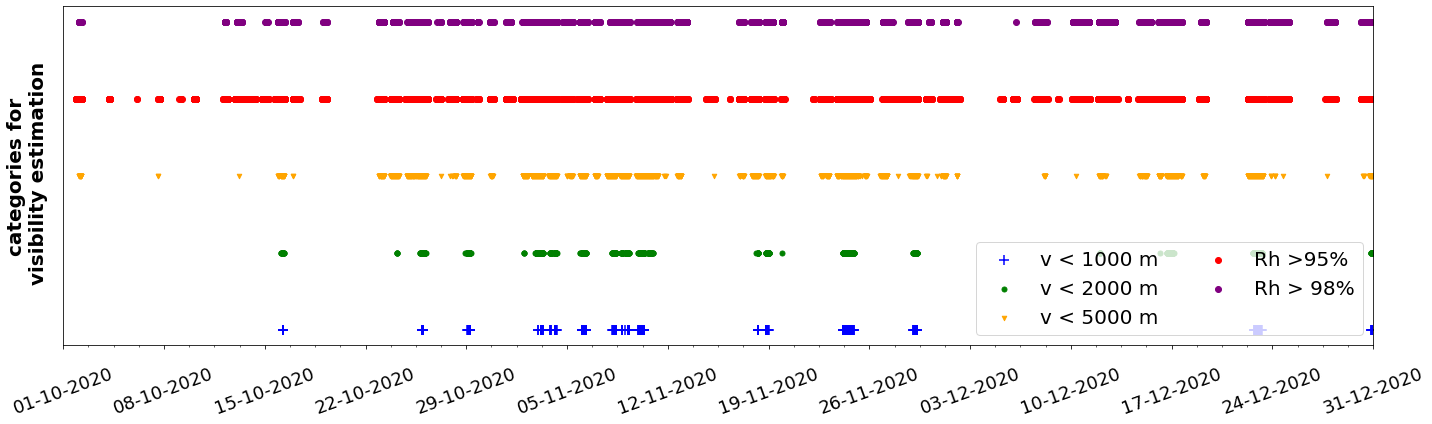

In [168]:
## October to December
## visibilyt and humidity
visi_oct_dec('Vis_1000', 'Vis_2000', 'Vis_5000','h95', 'h100',
            'categories for\n visibility estimation', 'v < 1000 m', 'v < 2000 m', 'v < 5000 m',
             'Rh >95%', 'Rh > 98%', loc = 'lower right')

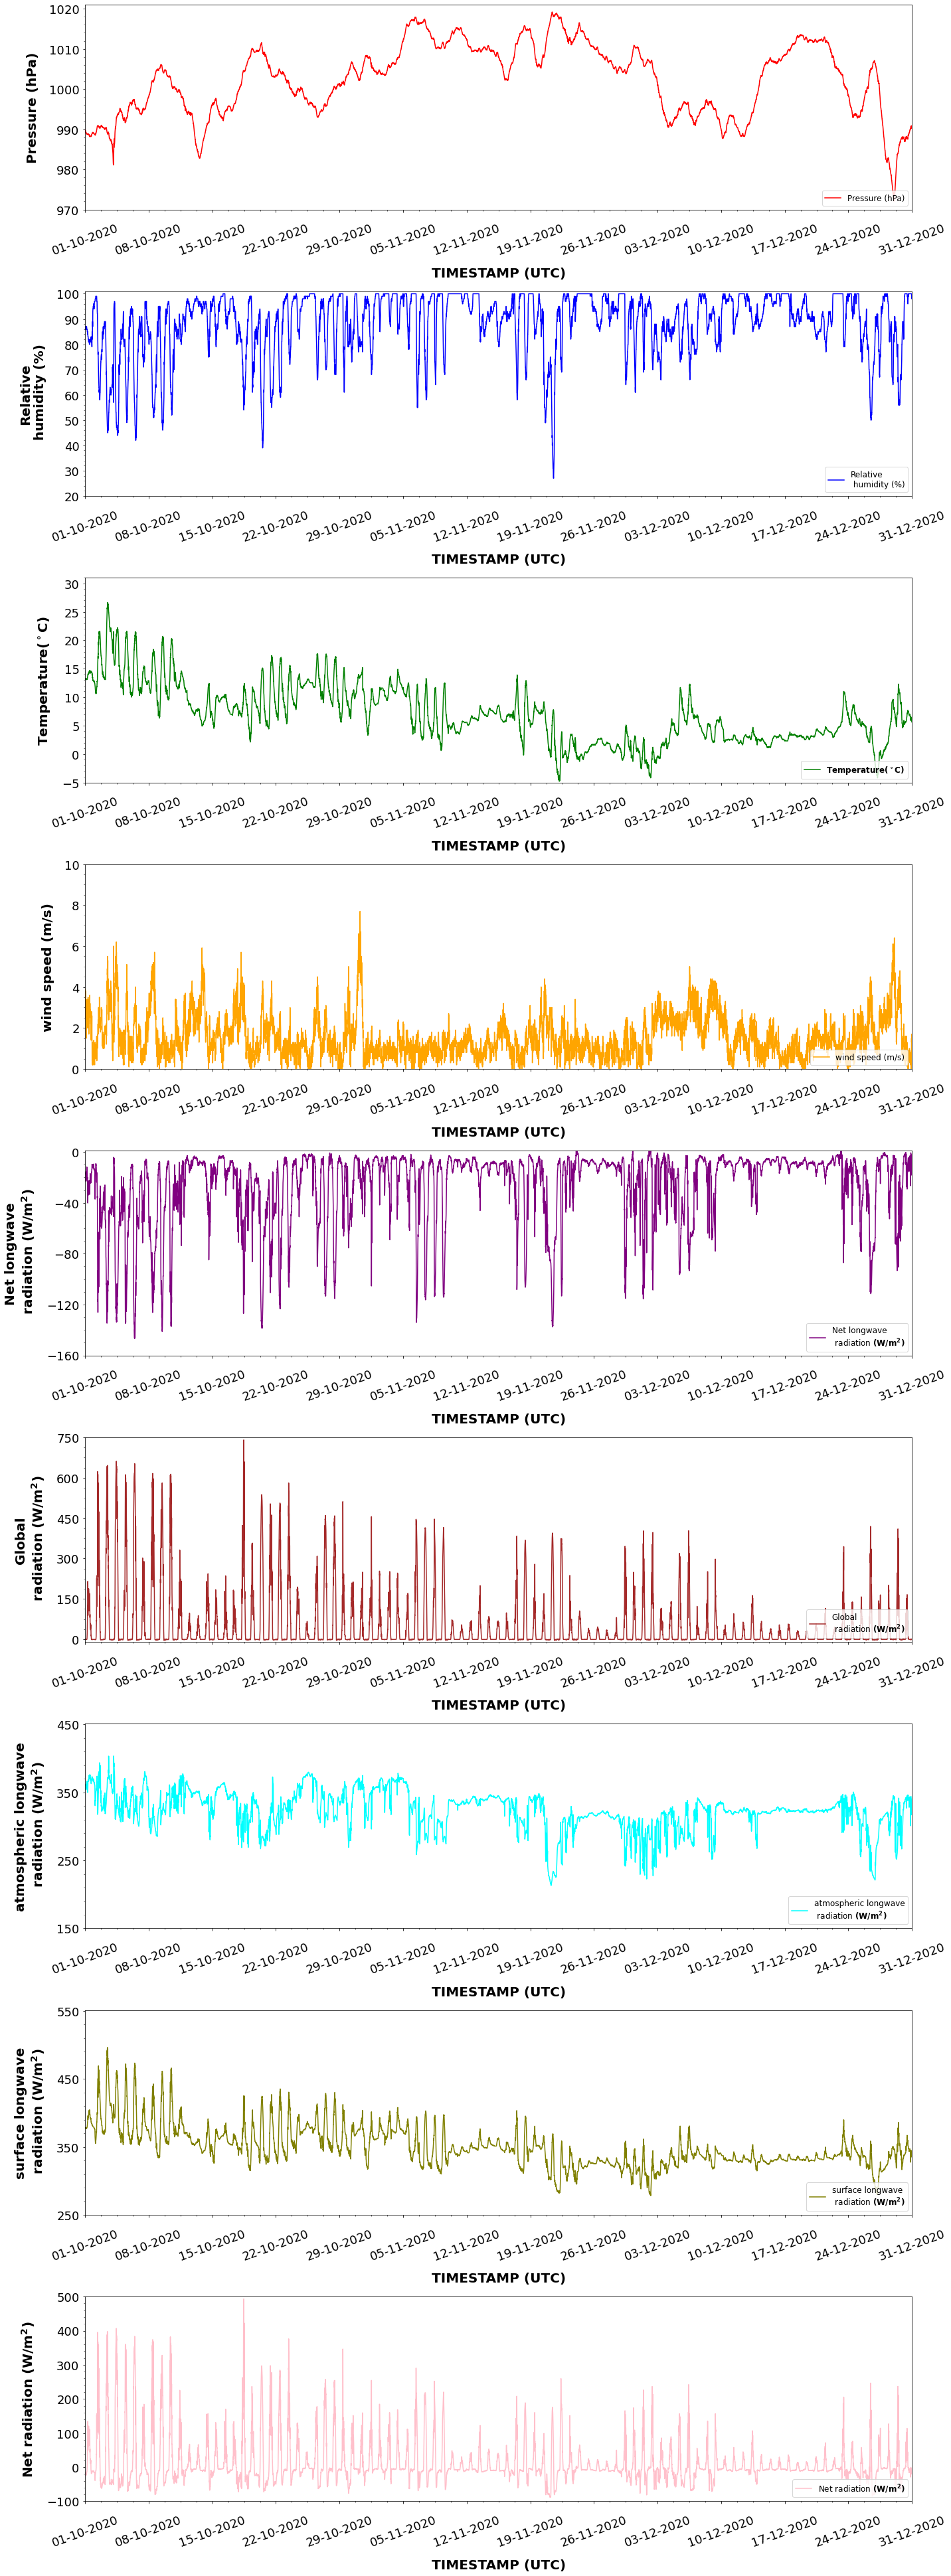

In [169]:
#### October to December

plotting(data_frame= df_oct_dec,ll_p = ['P','U', 'T','FS','longwave_net','SR', 'SAL', 'SSUL','net'], 
             ll_l = ['Pressure (hPa)','Relative\n humidity (%)', '$\mathbf{Temperature(^\circ C)}$', 
                     'wind speed (m/s)', 
                     'Net longwave\n radiation $\mathbf{(W/m^2)}$',
                     'Global\n radiation $\mathbf{(W/m^2)}$',
                     'atmospheric longwave\n radiation $\mathbf{(W/m^2)}$', 
                     'surface longwave\n radiation $\mathbf{(W/m^2)}$',
                     'Net radiation $\mathbf{(W/m^2)}$'], 
             ylim= [[970,1021],[20,101],[-5,31], [0,10],[-140,1],[-10,751],[150,451],[250,551],[-100,500]], 
             a=[970,20,-5,0,-160,0,150,250,-100] ,b =[1021,101,31,11,1,751,451,551,501],
         c = [10,10,5,2,40,150,100,100,100], 
             loc = 'lower right', 
         coli=['red', 'blue','green','orange', 'purple', 'brown','cyan','olive','pink'],left=dt.date(2020,10,1),
         right = dt.date(2020,12,31))



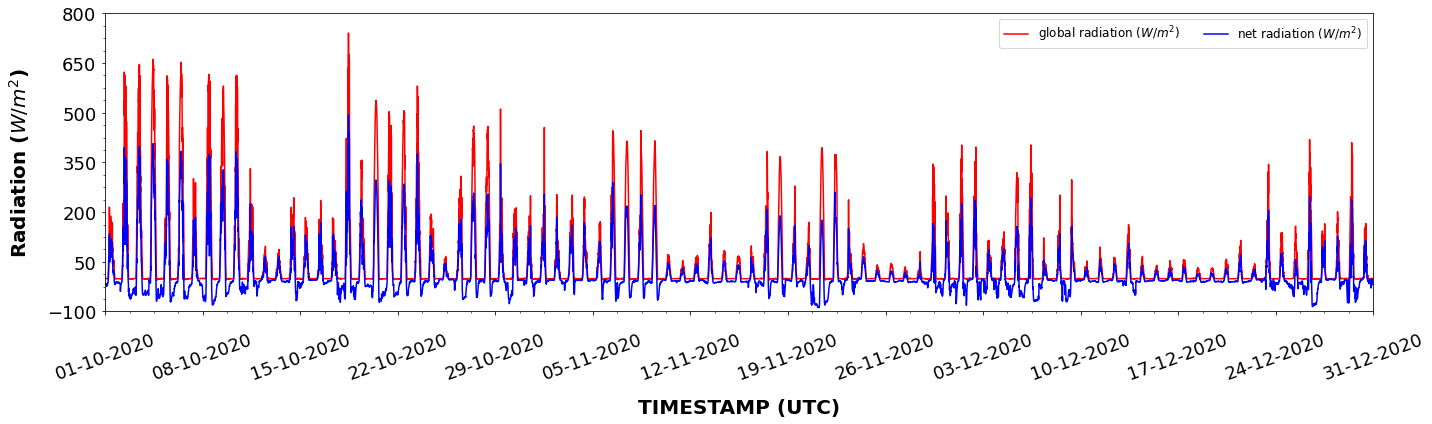

In [170]:
# OCtober to December
#global and net radiation

plot_oct_dec_many('SR', 'net', 'Radiation ($W/m^2$)', 'global radiation ($W/m^2$)', 
                 'net radiation ($W/m^2$)', 'red', 'blue', l = [-100,801], a = -100, b = 801, c = 150, 
                  loc = 'upper right')

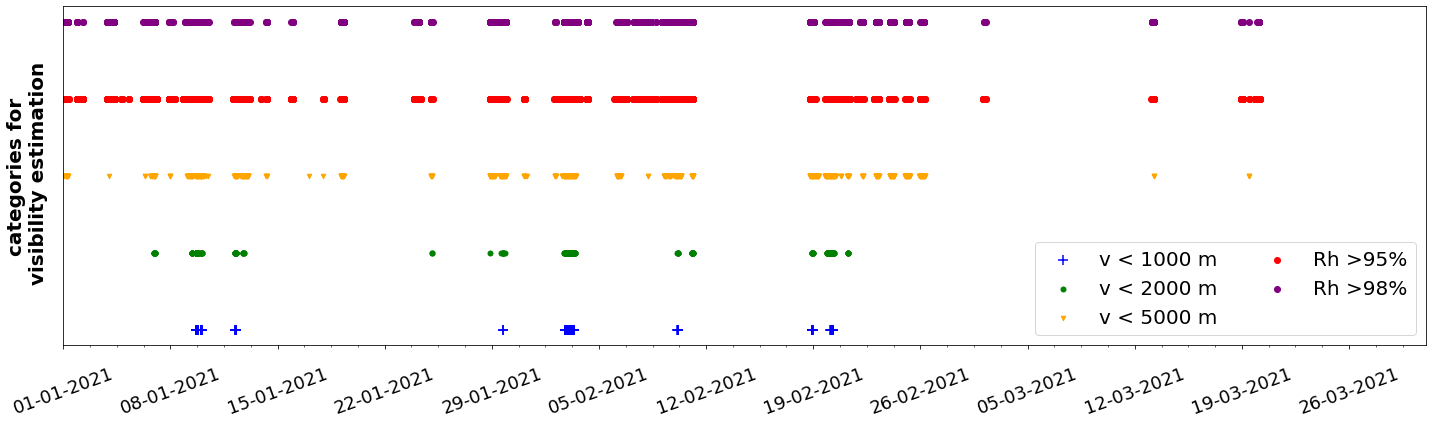

In [171]:
##visibilyt and humidity
## January to March
visi_jan_mar('Vis_1000', 'Vis_2000', 'Vis_5000','h95', 'h100',
            'categories for\n visibility estimation', 'v < 1000 m', 'v < 2000 m', 'v < 5000 m',
             'Rh >95%', 'Rh >98%', loc = 'lower right')


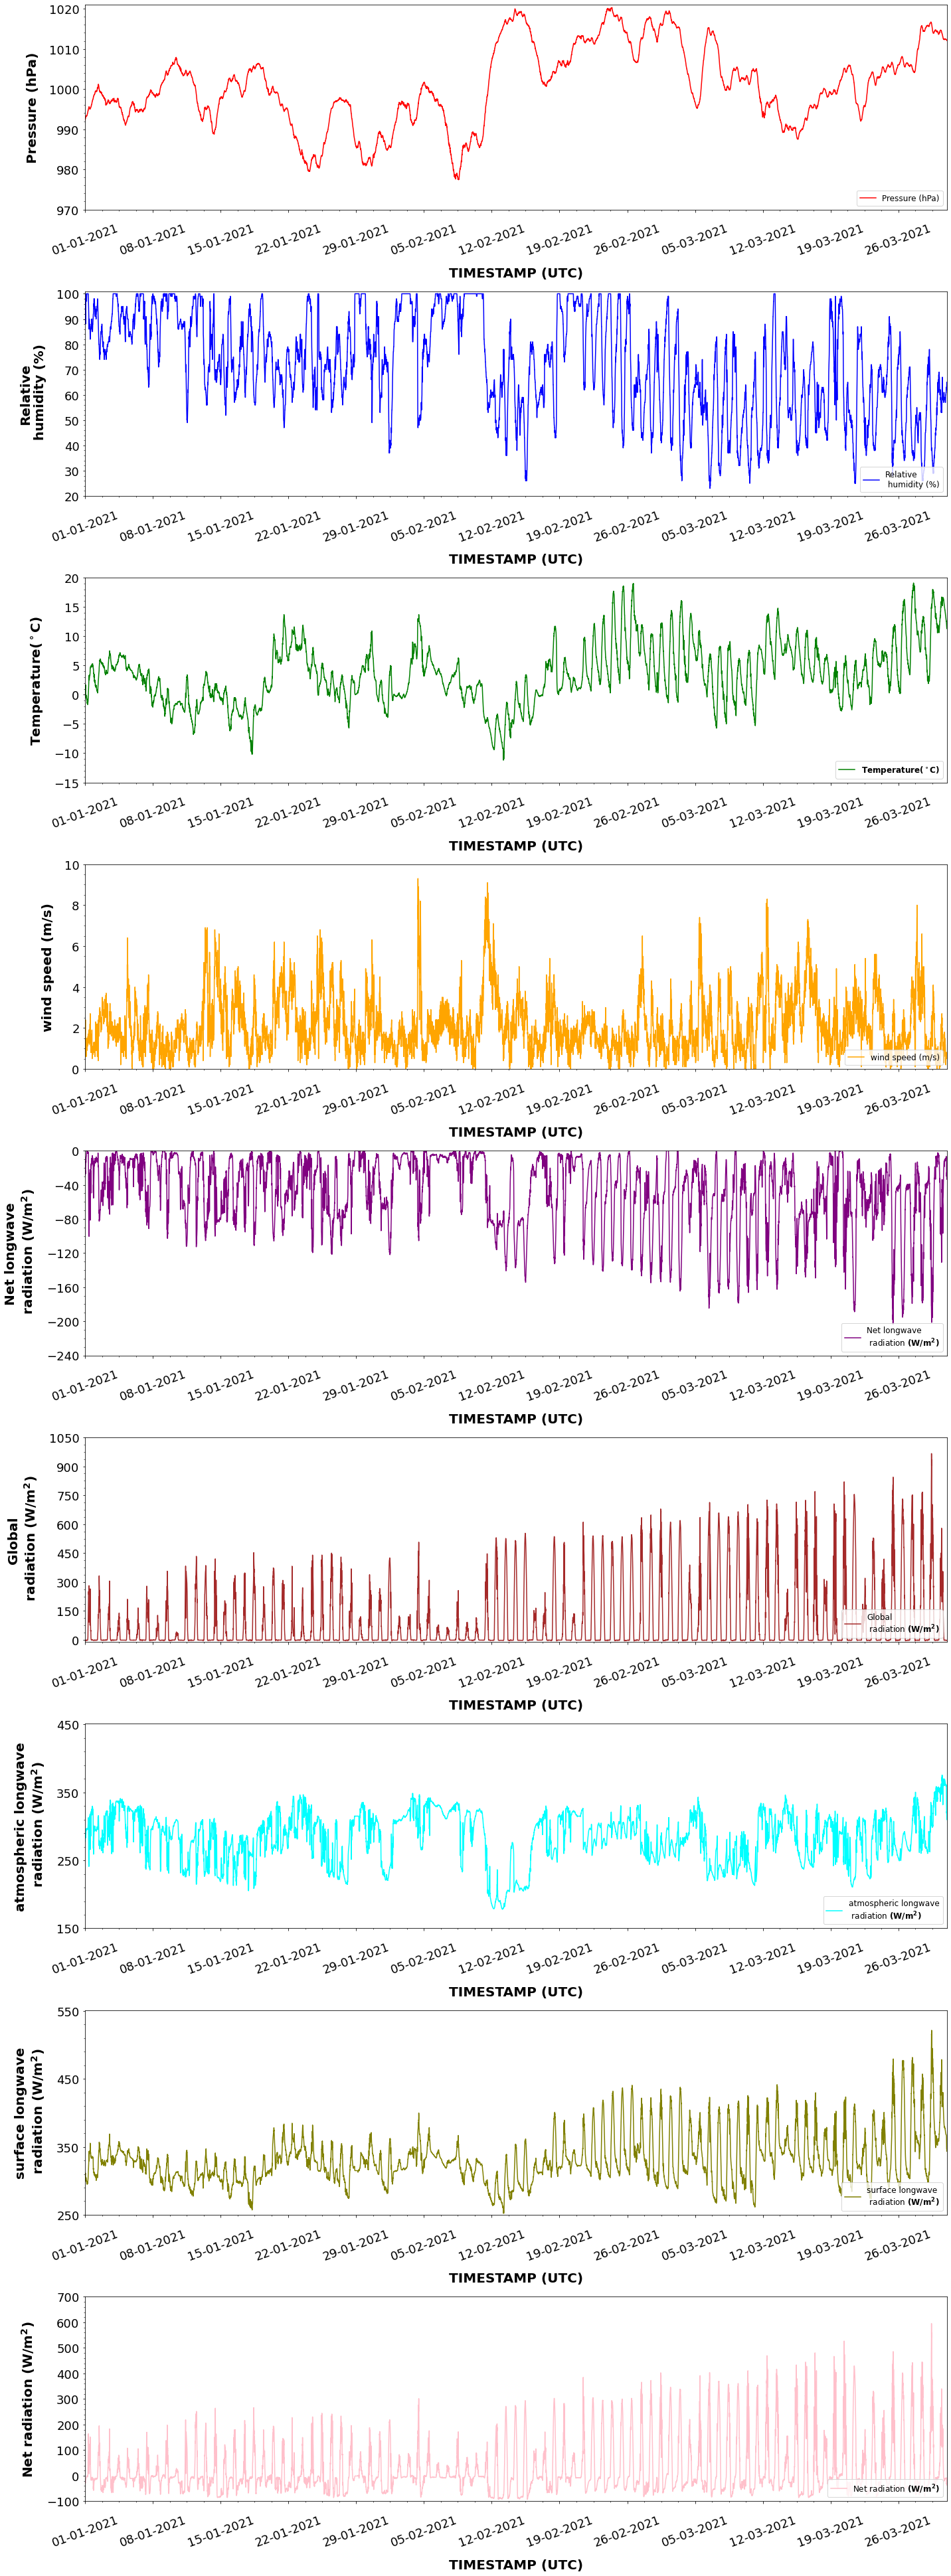

In [172]:
## January to March
plotting(data_frame= df_jan_mar,ll_p = ['P','U', 'T','FS','longwave_net','SR', 'SAL', 'SSUL','net'], 
             ll_l = ['Pressure (hPa)','Relative\n humidity (%)', '$\mathbf{Temperature(^\circ C)}$', 
                     'wind speed (m/s)', 
                     'Net longwave\n radiation $\mathbf{(W/m^2)}$',
                     'Global\n radiation $\mathbf{(W/m^2)}$',
                     'atmospheric longwave\n radiation $\mathbf{(W/m^2)}$', 
                     'surface longwave\n radiation $\mathbf{(W/m^2)}$',
                     'Net radiation $\mathbf{(W/m^2)}$'], 
             ylim= [[970,1021],[20,101],[-15,20], [0,10],[-240,0],[-10,1051],[150,451],[250,551],[-100,701]], 
             a=[970,20,-15,0,-240,0,150,250,-100] ,b =[1021,101,21,11,1,1051,451,551,701] , c = [10,10,5,2,40,150,100,100,100], 
             loc = 'lower right', coli=['red', 'blue','green','orange', 'purple', 'brown','cyan', 'olive','pink'],
        left = dt.date(2021,1,1), right= dt.date(2021,3,31))



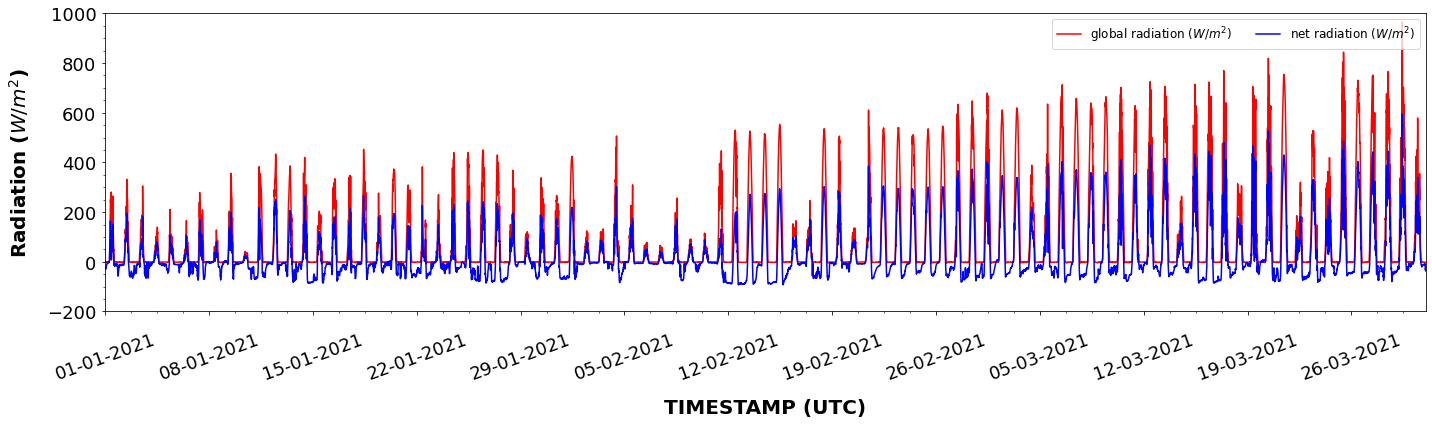

In [173]:
## January to March

plot_jan_mar_many('SR', 'net', 'Radiation ($W/m^2$)', 'global radiation ($W/m^2$)', 
                 'net radiation ($W/m^2$)', 'red', 'blue', l = [-100,1000], a = -200, b = 1001, c = 200, 
                  loc = 'upper right')

In [174]:
pl = pd.read_excel('/Users/varungandhi/Desktop/data_1/pollution.xlsx')

for i in range(len(pl['PM2.5'])):
    if type(pl['PM2.5'][i]) ==str:
        if pl['PM2.5'][i] == ' ':
            pl['PM2.5'][i]= pl['PM2.5'][i].replace(' ', '0')
            
    if pl['PM2.5'][i] == '0':
        pl['PM2.5'][i] = float('NAN')





In [175]:

pl['TIMESTAMP'] = pd.to_datetime(pl['TIMESTAMP'])
timee = pl['TIMESTAMP'].values - np.timedelta64(2, 'h')
pl['TIMESTAMP_UTC'] = timee

In [176]:
pl['PM2.5'] = pd.to_numeric(pl['PM2.5'])
pl['PM10'] = pd.to_numeric(pl['PM10'])
pl['NO'] = pd.to_numeric(pl['NO'])
pl['NO2'] = pd.to_numeric(pl['NO2'])
pl['SO2'] = pd.to_numeric(pl['SO2'])
pl['CO'] = pd.to_numeric(pl['CO'])
pl['BENZOL'] = pd.to_numeric(pl['BENZOL'])
pl['O3'] = pd.to_numeric(pl['O3'])

In [177]:
pl_oct_dec = pl[(pl['TIMESTAMP_UTC'] >= '2020-10-01 00:00:00') & 
                (pl['TIMESTAMP_UTC'] <= '2020-12-31 23:00:00')]

pl_jan_mar = pl[(pl['TIMESTAMP_UTC'] >= '2021-01-01 00:00:00') & 
                (pl['TIMESTAMP_UTC'] <= '2021-03-31 23:00:00')]

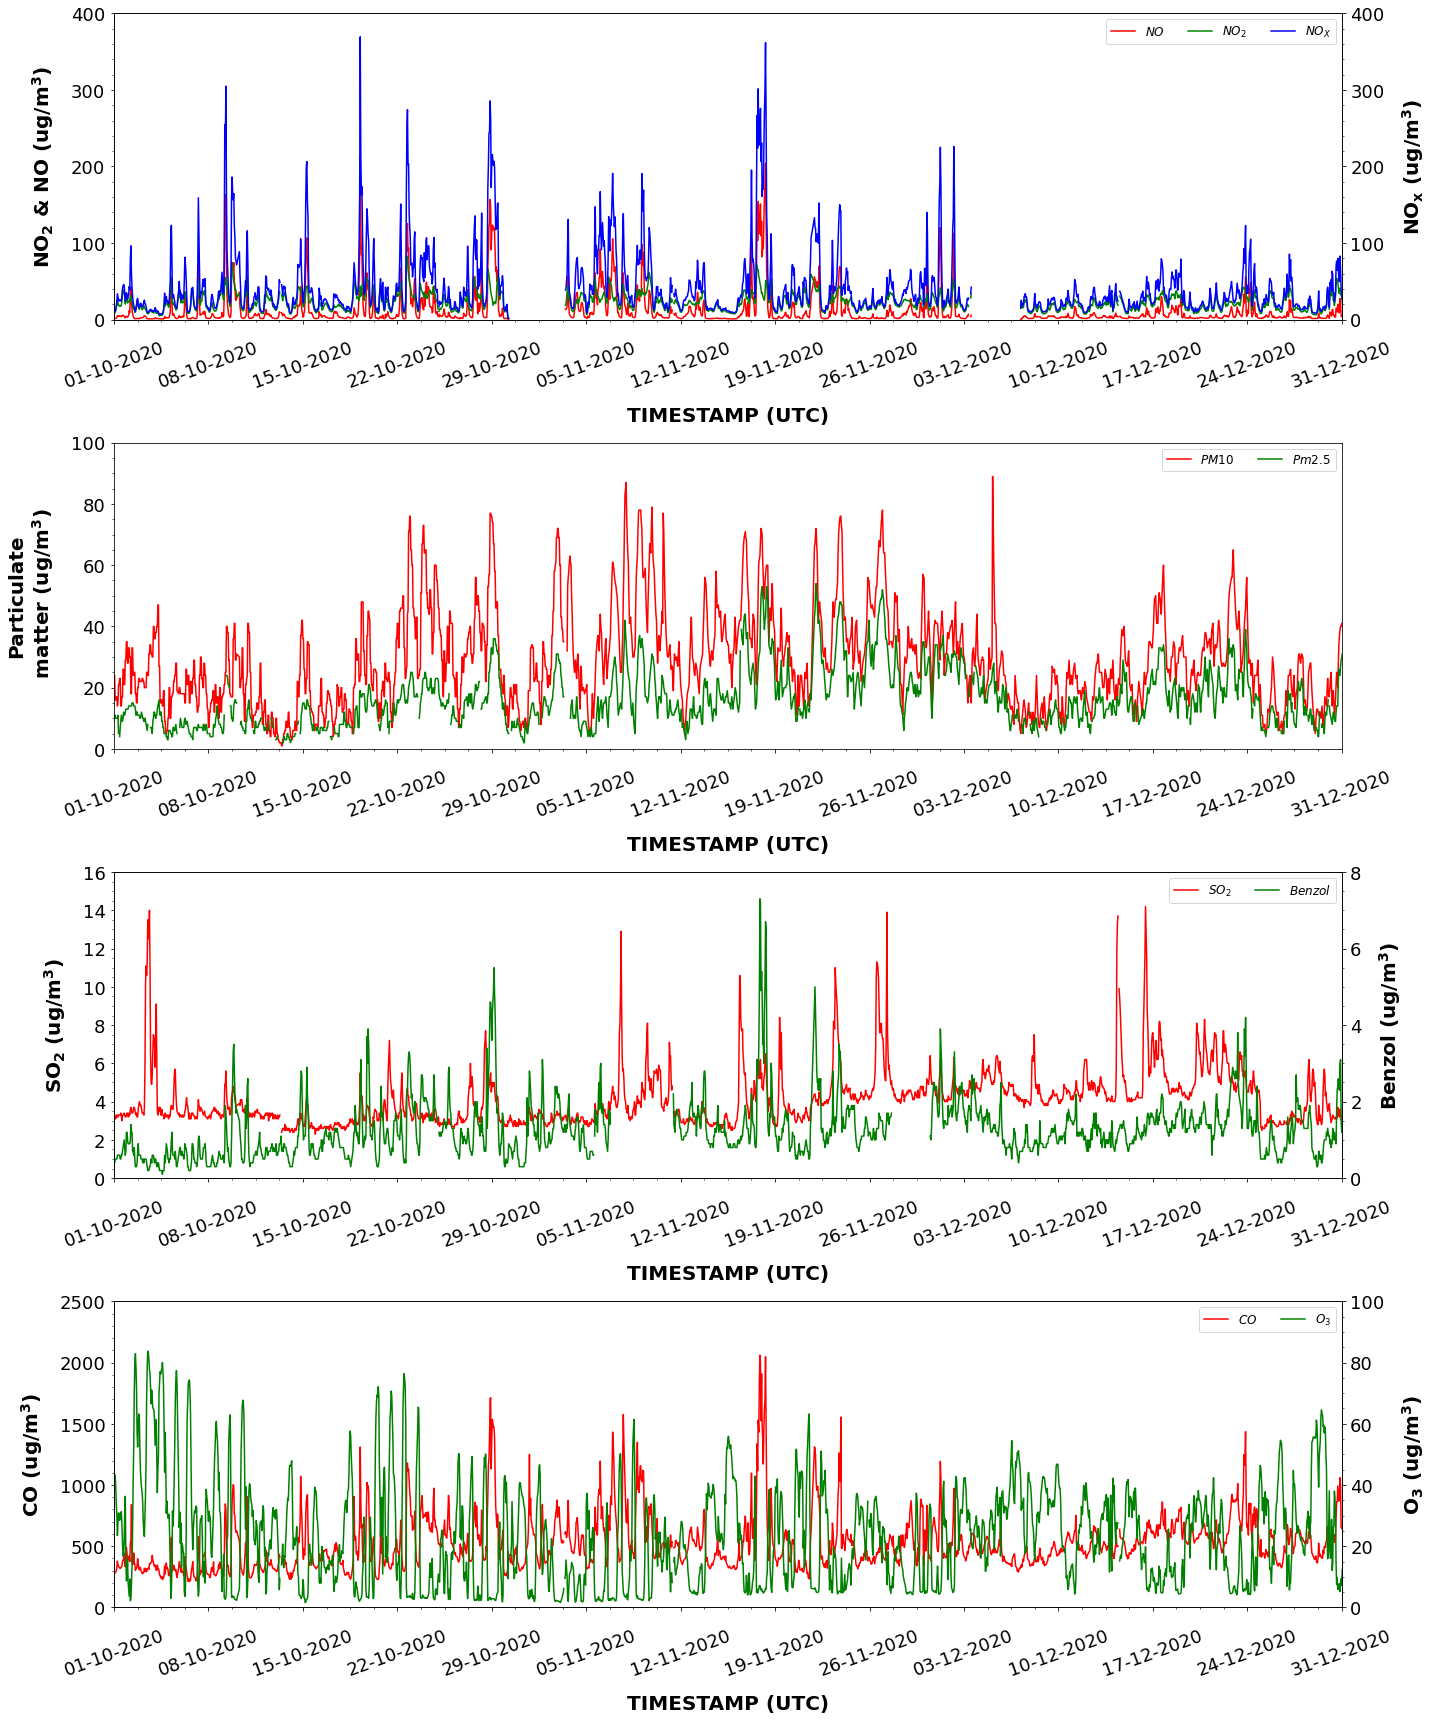

In [178]:
fig, (ax1,ax2,ax3,ax4) = plt.subplots(4,1,figsize = (20,24), sharex= False)

left = dt.date(2020, 10, 1)
right = dt.date(2020, 12, 31)
l1 = ax1.plot(pl_oct_dec['TIMESTAMP_UTC'],pl_oct_dec['NO'], label = '$NO$'  ,color = 'r' )
l1_1 = ax1.plot(pl_oct_dec['TIMESTAMP_UTC'],pl_oct_dec['NO2'],label = '$NO_2$',color = 'g')
ax1.set_ylim([0,400])
ax1.set_yticks(np.arange(0,401,100))
ax1.set_ylabel('$\mathbf{NO_2\ &\ NO\ (ug/m^3)}$', fontsize=20, labelpad =15 )

ax1_1 = ax1.twinx()
l1_2 = ax1_1.plot(pl_oct_dec['TIMESTAMP_UTC'],pl_oct_dec['NOX'],label = '$NO_X$', color = 'b')
ax1_1.set_ylim([0,400])
ax1_1.set_yticks(np.arange(0,401,100))
ax1_1.set_ylabel('$\mathbf{NO_x\ (ug/m^3)}$', fontsize=20, labelpad =15)


ax2.plot(pl_oct_dec['TIMESTAMP_UTC'],pl_oct_dec['PM10'], label = '$PM10$'  ,color = 'r' )
ax2.plot(pl_oct_dec['TIMESTAMP_UTC'],pl_oct_dec['PM2.5'],label = '$Pm2.5$',color = 'g')
ax2.set_ylim([0,100])
ax2.set_yticks(np.arange(0,101,20))
ax2.set_ylabel('Particulate\n matter $\mathbf {(ug/m^3)}$', fontsize=20, labelpad =15,fontweight = 'bold')
ax2.legend(loc = 0,prop = {'size':12},ncol = 5)

l3 = ax3.plot(pl_oct_dec['TIMESTAMP_UTC'],pl_oct_dec['SO2'], label = '$SO_2$'  ,color = 'r' )
ax3.set_ylim([0,16])
ax3.set_yticks(np.arange(0,17,2))
ax3.set_ylabel('$\mathbf{SO_2\ (ug/m^3)}$', fontsize=20, labelpad =15 )

ax3_1 = ax3.twinx()
l3_1 = ax3_1.plot(pl_oct_dec['TIMESTAMP_UTC'],pl_oct_dec['BENZOL'],label = '$Benzol$', color = 'g')
ax3_1.set_ylim([0,8])
ax3_1.set_yticks(np.arange(0,8.1,2))
ax3_1.set_ylabel('$\mathbf{Benzol\ (ug/m^3)}$', fontsize=20, labelpad =15)


l4 = ax4.plot(pl_oct_dec['TIMESTAMP_UTC'],pl_oct_dec['CO'], label = '$CO$'  ,color = 'r' )
ax4.set_ylim([0,2500])
ax4.set_yticks(np.arange(0,2501,500))
ax4.set_ylabel('$\mathbf{CO\ (ug/m^3)}$', fontsize=20, labelpad =15 )

ax4_1 = ax4.twinx()
l4_1 = ax4_1.plot(pl_oct_dec['TIMESTAMP_UTC'],pl_oct_dec['O3'],label = '$O_3$', color = 'g')
ax4_1.set_ylim([0,100])
ax4_1.set_yticks(np.arange(0,101,20))
ax4_1.set_ylabel('$\mathbf{O_3\ (ug/m^3)}$', fontsize=20, labelpad =15)


for axi in (ax1,ax1_1,ax2,ax3,ax3_1,ax4,ax4_1):
    axi.tick_params(axis='both', which='major', labelsize=18)
    axi.tick_params(axis='both', which='minor', labelsize=8)
    axi.tick_params(axis='x', labelrotation= 20)
    axi.minorticks_on()
       
    axi.set_xbound(left, right)
    axi.xaxis.set_major_formatter(DateFormatter("%d-%m-%Y"))
    axi.xaxis.set_major_locator(DayLocator(interval= 7))
    axi.set_xlabel('TIMESTAMP (UTC)',fontsize= 20, labelpad = 15,fontweight = 'bold')   
    axi.tick_params(axis='x', which='major', pad=15)
    axi.tick_params(axis='y', which='major', pad=5)

def x(l1,l2,l3 = None):
    lns = l1 + l2 + l3
    labs = [l.get_label() for l in lns]
    return [lns,labs]

ax1.legend(x(l1,l1_1,l1_2)[0],x(l1,l1_1,l1_2)[1],loc=0, prop = {'size':12},ncol = 5)
ax3.legend(x(l3,l3_1,[])[0],x(l3,l3_1,[])[1],loc=1, prop = {'size':12},ncol = 5)
ax4.legend(x(l4,l4_1,[])[0],x(l4,l4_1,[])[1],loc=1, prop = {'size':12},ncol = 5)

fig.tight_layout()

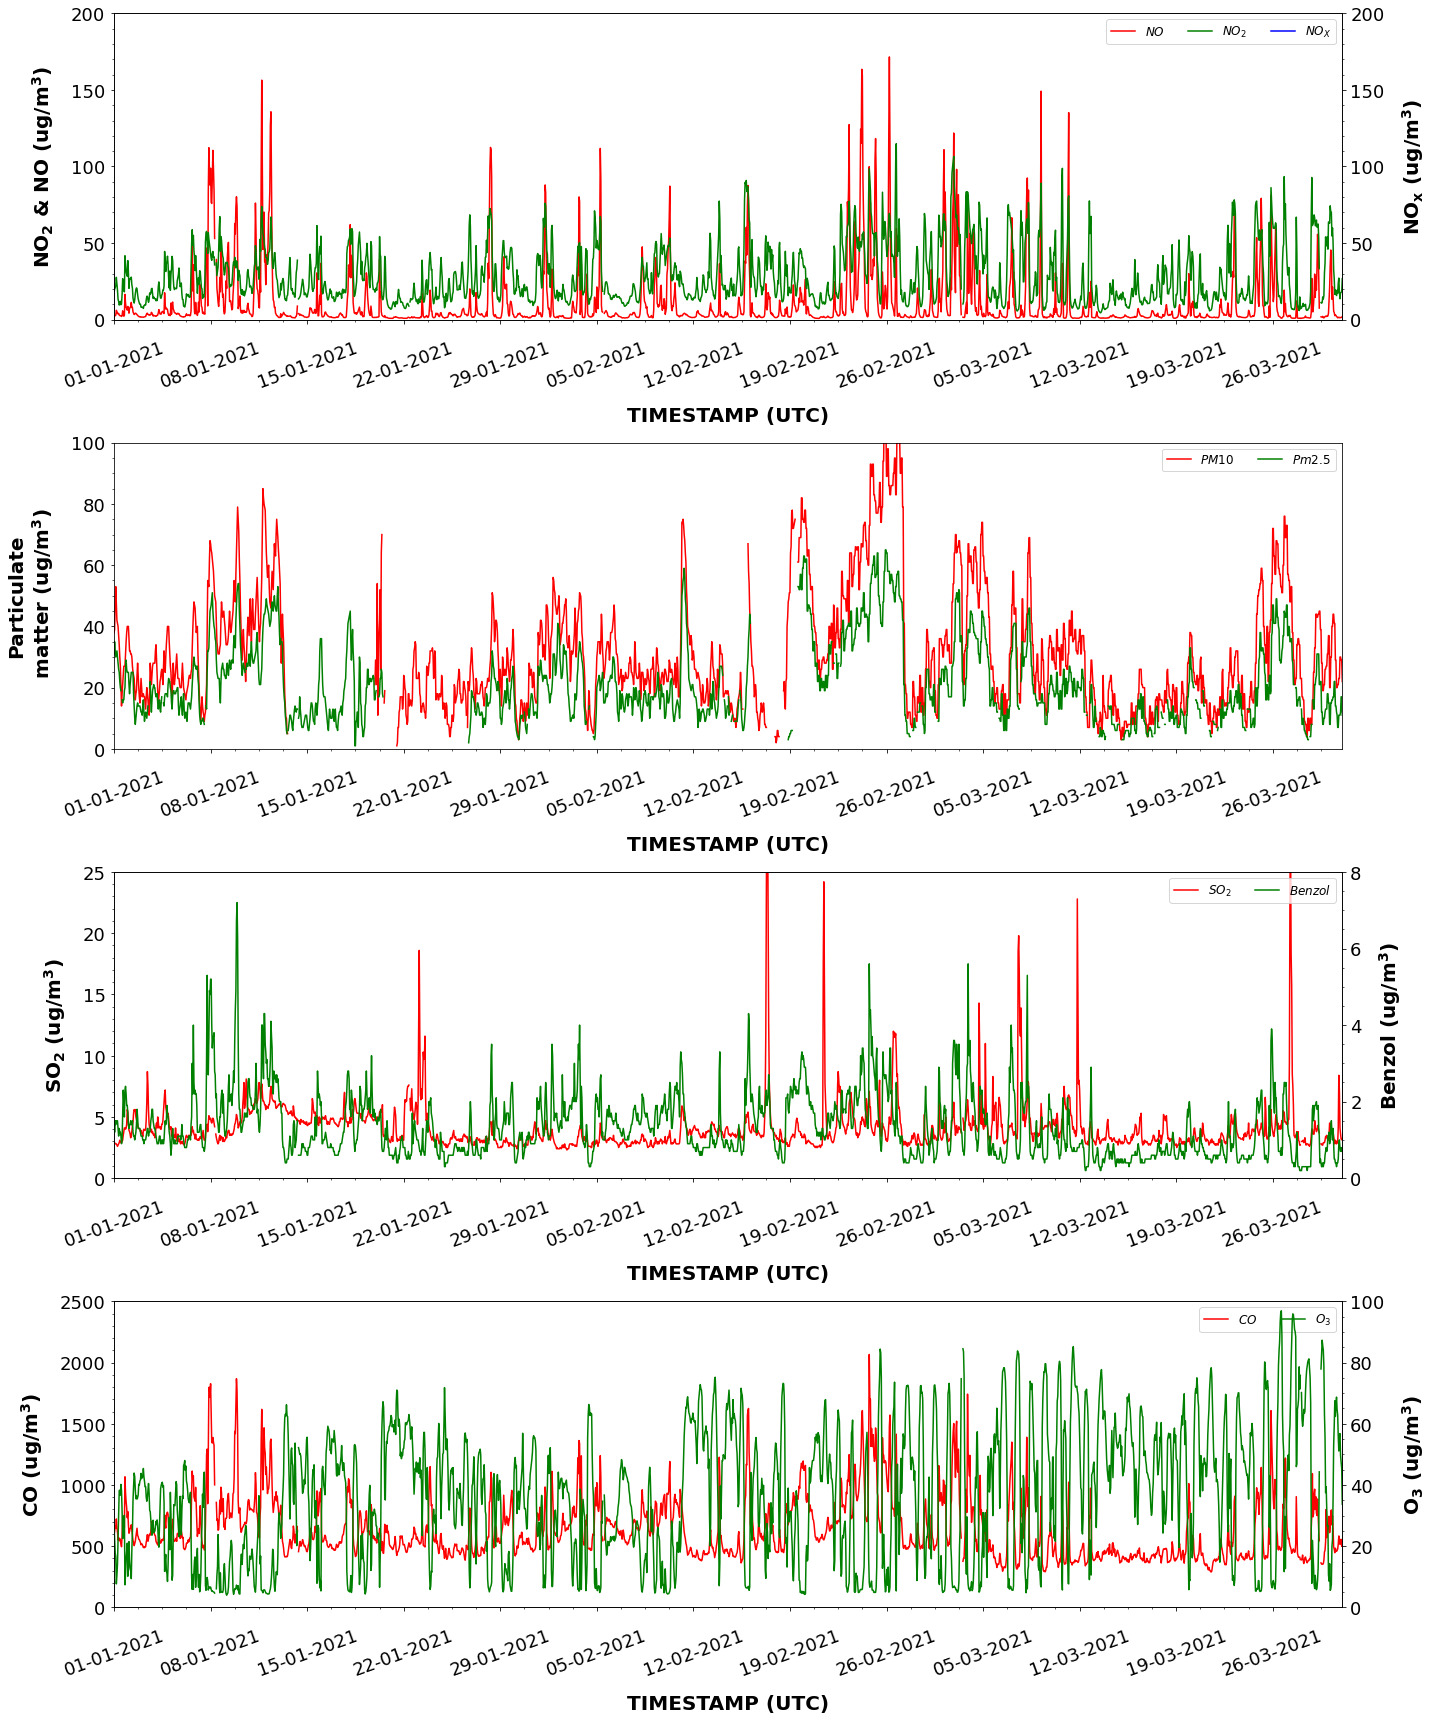

In [179]:
fig, (ax1,ax2,ax3,ax4) = plt.subplots(4,1,figsize = (20,24), sharex= False)

left = dt.date(2021, 1, 1)
right = dt.date(2021,3, 31)
l1 = ax1.plot(pl_jan_mar['TIMESTAMP_UTC'],pl_jan_mar['NO'], label = '$NO$'  ,color = 'r' )
l1_1 = ax1.plot(pl_jan_mar['TIMESTAMP_UTC'],pl_jan_mar['NO2'],label = '$NO_2$',color = 'g')
ax1.set_ylim([0,200])
ax1.set_yticks(np.arange(0,201,50))
ax1.set_ylabel('$\mathbf{NO_2\ &\ NO\ (ug/m^3)}$', fontsize=20, labelpad =15 )

ax1_1 = ax1.twinx()
l1_2 = ax1_1.plot(pl_oct_dec['TIMESTAMP_UTC'],pl_oct_dec['NOX'],label = '$NO_X$', color = 'b')
ax1_1.set_ylim([0,200])
ax1_1.set_yticks(np.arange(0,201,50))
ax1_1.set_ylabel('$\mathbf{NO_x\ (ug/m^3)}$', fontsize=20, labelpad =15)

ax2.plot(pl_jan_mar['TIMESTAMP_UTC'],pl_jan_mar['PM10'], label = '$PM10$'  ,color = 'r' )
ax2.plot(pl_jan_mar['TIMESTAMP_UTC'],pl_jan_mar['PM2.5'],label = '$Pm2.5$',color = 'g')
ax2.set_ylim([0,100])
ax2.set_yticks(np.arange(0,101,20))
ax2.set_ylabel('Particulate\n matter $\mathbf {(ug/m^3)}$', fontsize=20, labelpad =15,fontweight = 'bold')
ax2.legend(loc = 0,prop = {'size':12},ncol = 5)

l3 = ax3.plot(pl_jan_mar['TIMESTAMP_UTC'],pl_jan_mar['SO2'], label = '$SO_2$'  ,color = 'r' )
ax3.set_ylim([0,25])
ax3.set_yticks(np.arange(0,26,5))
ax3.set_ylabel('$\mathbf{SO_2\ (ug/m^3)}$', fontsize=20, labelpad =15 )

ax3_1 = ax3.twinx()
l3_1 = ax3_1.plot(pl_jan_mar['TIMESTAMP_UTC'],pl_jan_mar['BENZOL'],label = '$Benzol$', color = 'g')
ax3_1.set_ylim([0,8])
ax3_1.set_yticks(np.arange(0,8.1,2))
ax3_1.set_ylabel('$\mathbf{Benzol\ (ug/m^3)}$', fontsize=20, labelpad =15)


l4 = ax4.plot(pl_jan_mar['TIMESTAMP_UTC'],pl_jan_mar['CO'], label = '$CO$'  ,color = 'r' )
ax4.set_ylim([0,2500])
ax4.set_yticks(np.arange(0,2501,500))
ax4.set_ylabel('$\mathbf{CO\ (ug/m^3)}$', fontsize=20, labelpad =15 )

ax4_1 = ax4.twinx()
l4_1 = ax4_1.plot(pl_jan_mar['TIMESTAMP_UTC'],pl_jan_mar['O3'],label = '$O_3$', color = 'g')
ax4_1.set_ylim([0,100])
ax4_1.set_yticks(np.arange(0,101,20))
ax4_1.set_ylabel('$\mathbf{O_3\ (ug/m^3)}$', fontsize=20, labelpad =15)

for axi in (ax1,ax1_1,ax2,ax3,ax3_1,ax4,ax4_1):
    axi.tick_params(axis='both', which='major', labelsize=18)
    axi.tick_params(axis='both', which='minor', labelsize=8)
    axi.tick_params(axis='x', labelrotation= 20)
    axi.minorticks_on()
       
    axi.set_xbound(left, right)
    axi.xaxis.set_major_formatter(DateFormatter("%d-%m-%Y"))
    axi.xaxis.set_major_locator(DayLocator(interval= 7))
    axi.set_xlabel('TIMESTAMP (UTC)',fontsize= 20, labelpad = 15,fontweight = 'bold')   
    axi.tick_params(axis='x', which='major', pad=15)
    axi.tick_params(axis='y', which='major', pad=5)
    
def x(l1,l2,l3 = None):
    lns = l1 + l2 + l3
    labs = [l.get_label() for l in lns]
    return [lns,labs]

ax1.legend(x(l1,l1_1,l1_2)[0],x(l1,l1_1,l1_2)[1],loc=0, prop = {'size':12},ncol = 5)
ax3.legend(x(l3,l3_1,[])[0],x(l3,l3_1,[])[1],loc=1, prop = {'size':12},ncol = 5)
ax4.legend(x(l4,l4_1,[])[0],x(l4,l4_1,[])[1],loc=1, prop = {'size':12},ncol = 5)

    
fig.tight_layout()


In [116]:

x(l3,l3_1, l3 = [])

[[<matplotlib.lines.Line2D at 0x7fd4e9abf640>,
 ['$SO_2$', '$Benzol$']]

In [104]:
l1_2